# Project Name: Dimensionality Reduction for Spam Detection: Applying PCA to TF-IDF Vectors

**Overview:**
This educational project introduces students to the concept of dimensionality reduction applied to text data. Students will use Principal Component Analysis (PCA) to reduce the complexity of TF-IDF vectors from a spam detection dataset, enhancing classifier performance and interpretability.

You have:
* A spam detection dataset containing labeled email or text messages.
* Basic proficiency in Python, scikit-learn, pandas, NumPy, and machine learning classification methods.

**We will:**
1. Convert text data into TF-IDF vectors, preparing them for PCA dimensionality reduction.
2. Apply PCA to significantly reduce the dimensionality of TF-IDF vectors, selecting principal components that capture key features.
3. Train a classifier (e.g., logistic regression or support vector machine) on the reduced-dimension data and evaluate its performance using metrics like accuracy, precision, recall, and F1-score.

**Goal:**
Students will gain practical experience with dimensionality reduction techniques and understand how PCA can optimize text classification tasks, improving both computational efficiency and classification accuracy in real-world spam detection scenarios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import re
import string
from collections import Counter
import base64
from IPython.display import display, HTML
import os
np.random.seed(42)

## Notebook utility

In [3]:
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA2.png", "PCA3.png", "PCA4.webp", "PCA5.webp", "textvect1.webp", "textvect2.webp", "textvect3.webp"]
image_size = [1000, 700, 700, 400, 600, 500, 600, 600, 600]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../img/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


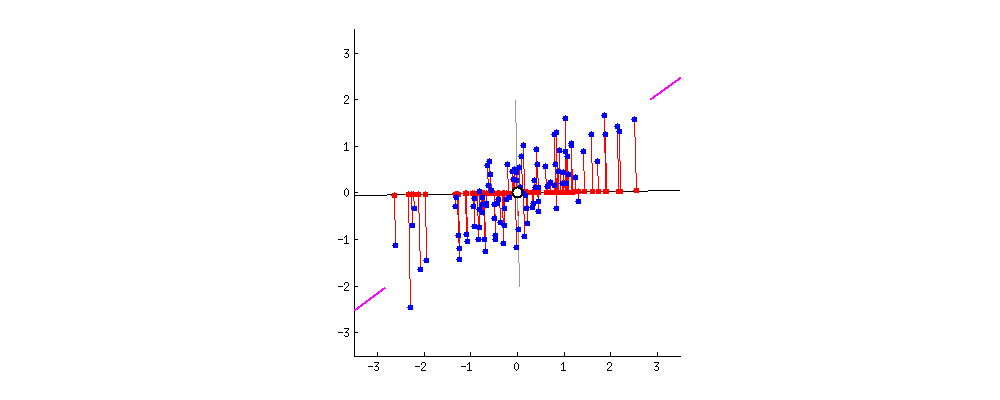

In [3]:
display(HTML(images_html[0]))


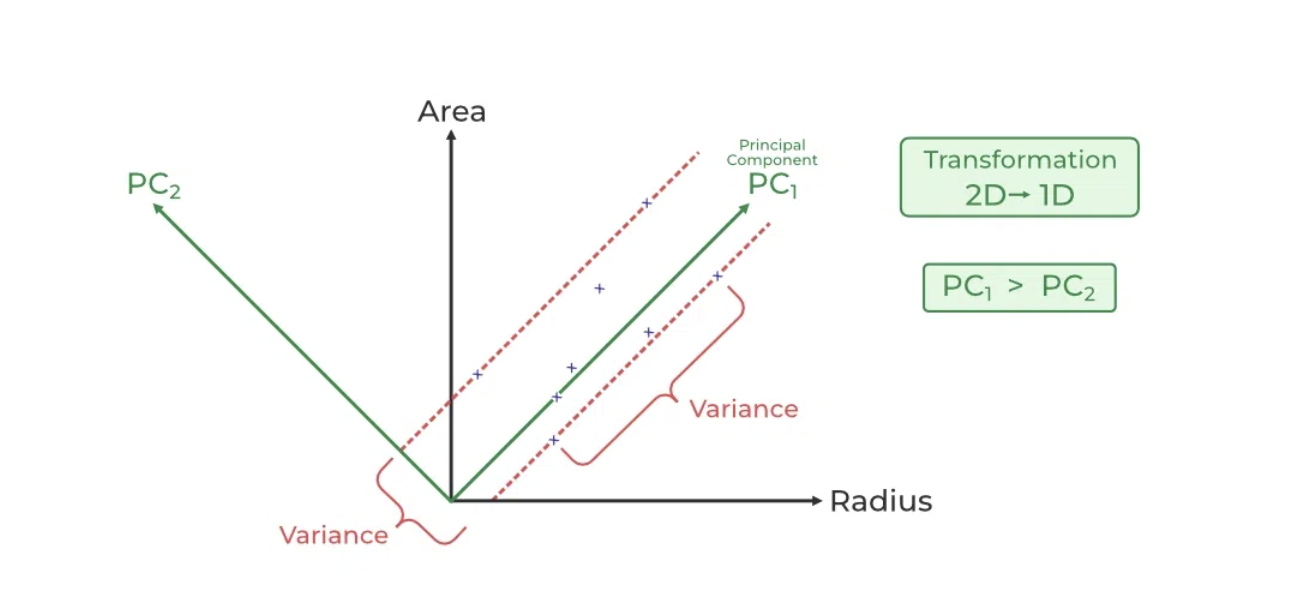

In [4]:
display(HTML(images_html[1]))

#### SVD


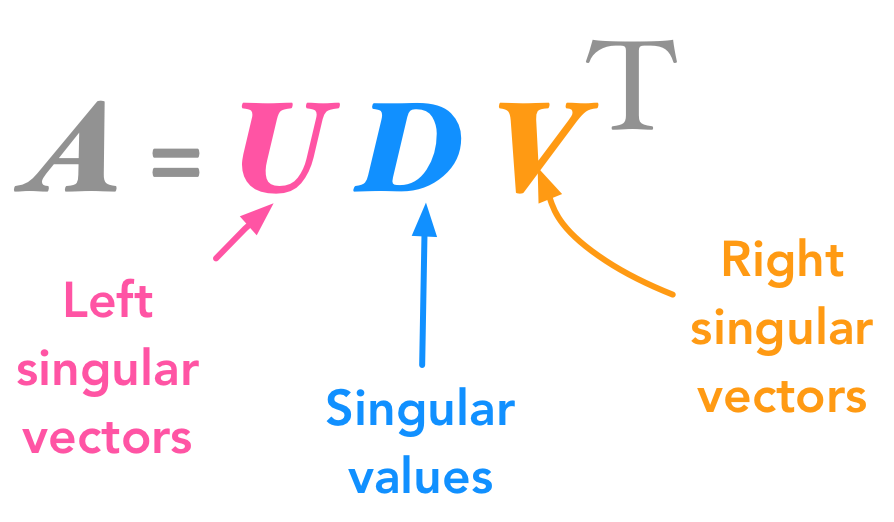

In [5]:
display(HTML(images_html[3]))


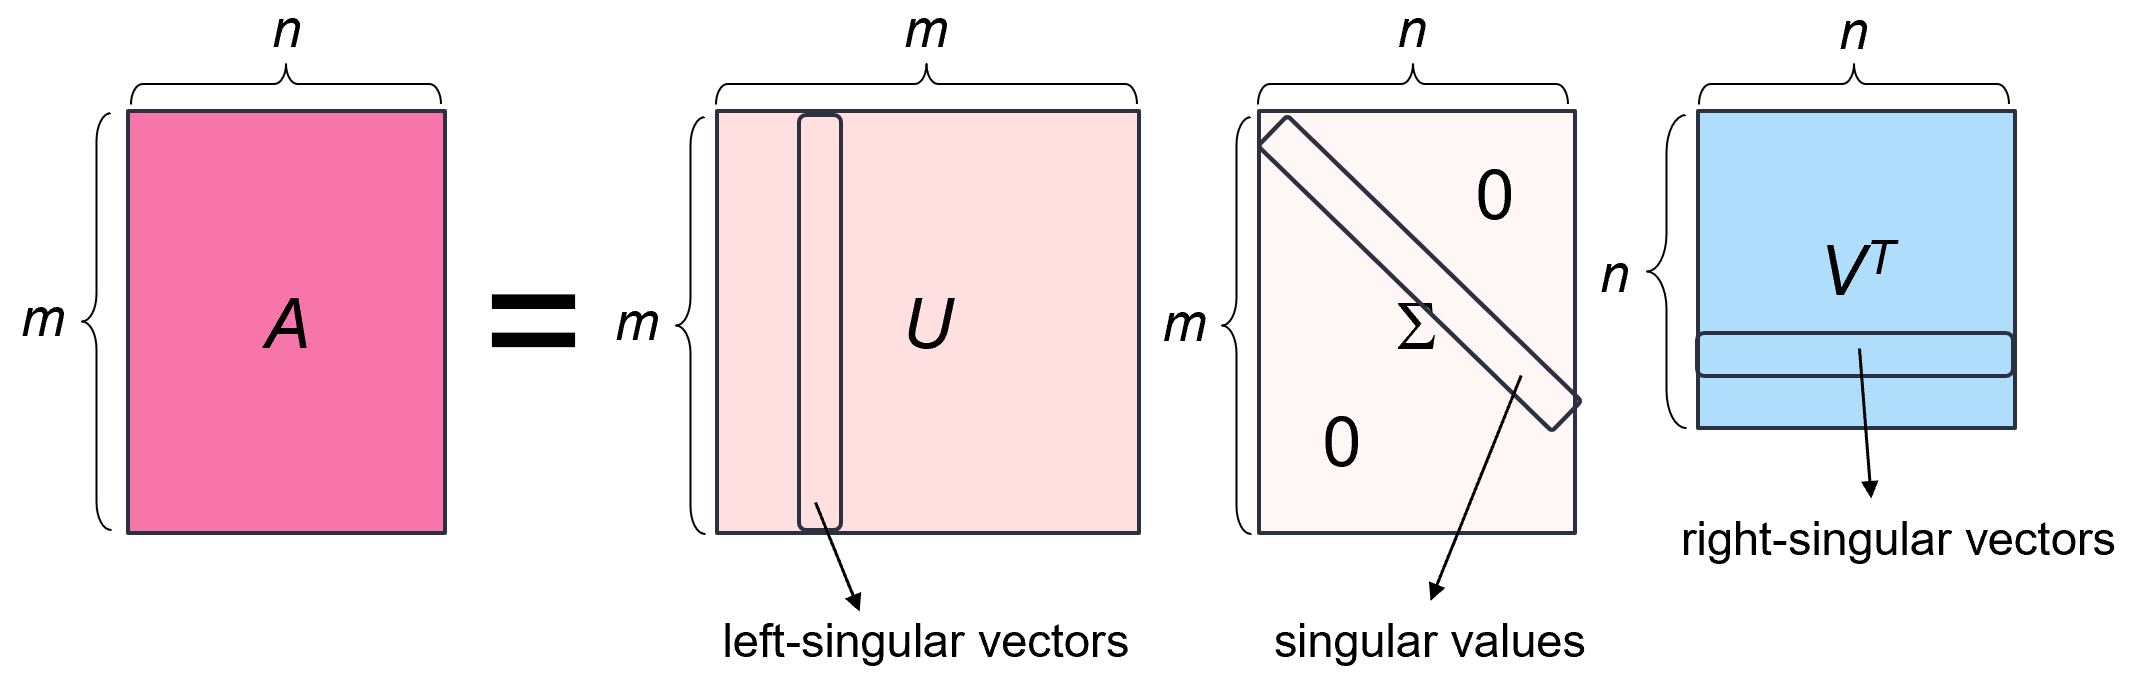

In [6]:
display(HTML(images_html[4]))

#### EVD


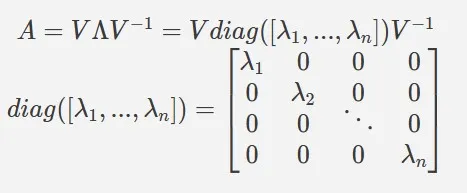

In [7]:
display(HTML(images_html[5]))


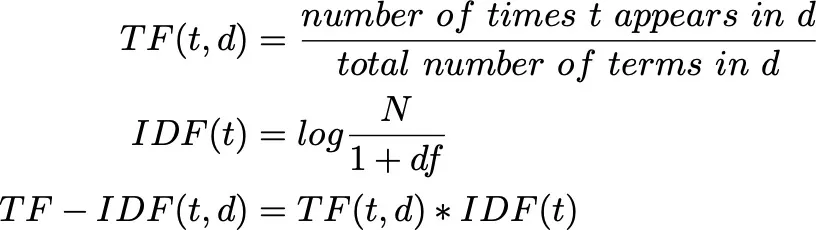

In [4]:
display(HTML(images_html[6]))


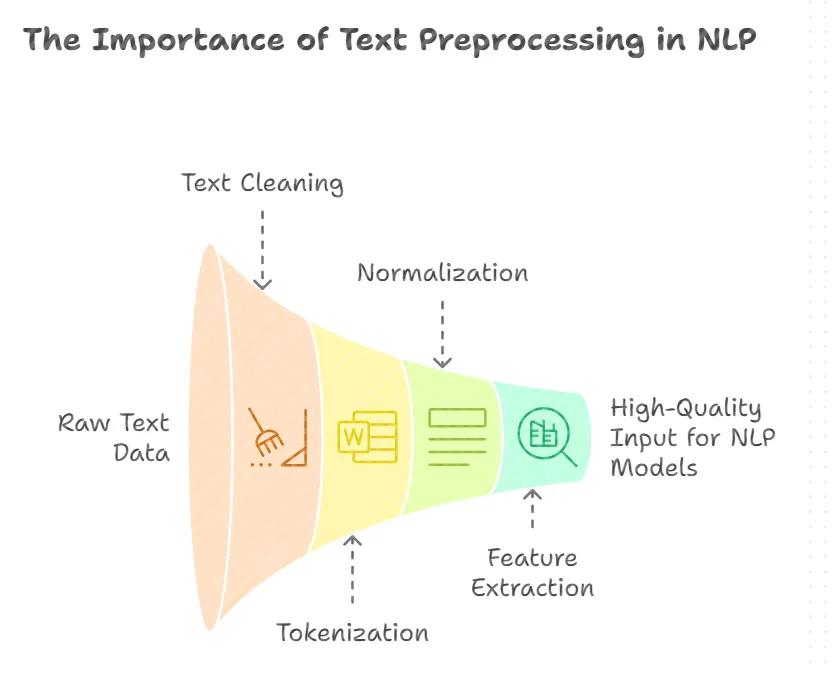

In [5]:
display(HTML(images_html[7]))


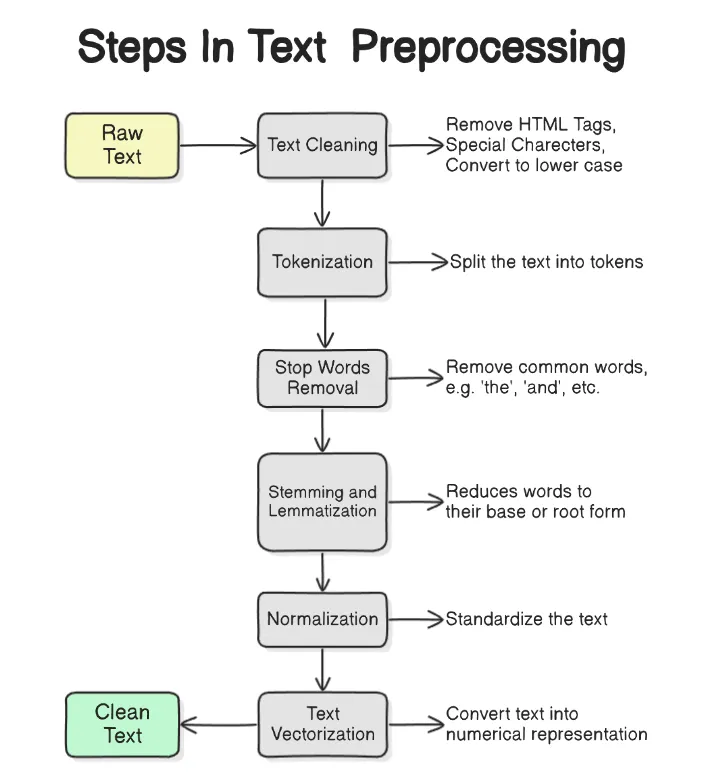

In [6]:
display(HTML(images_html[8]))

## Loading and exploring dataset

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={"v1":"Category","v2":"Text"})
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


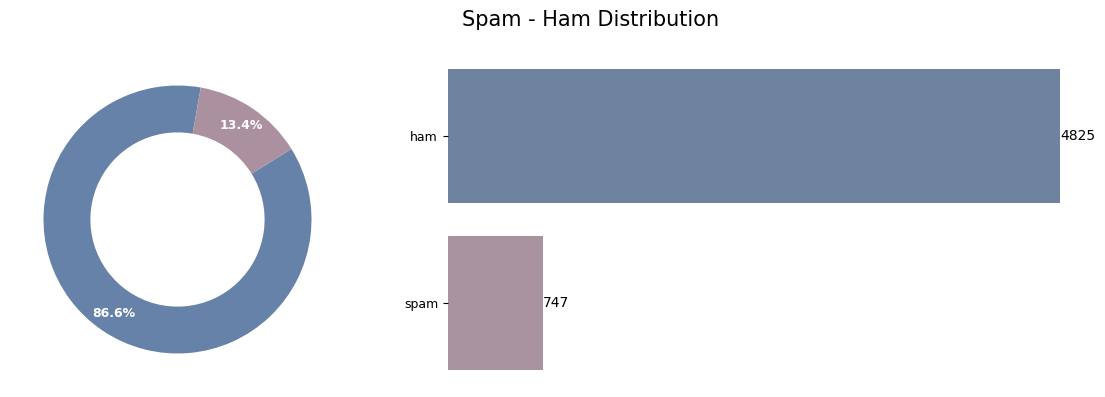

In [13]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Ham Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [6]:
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


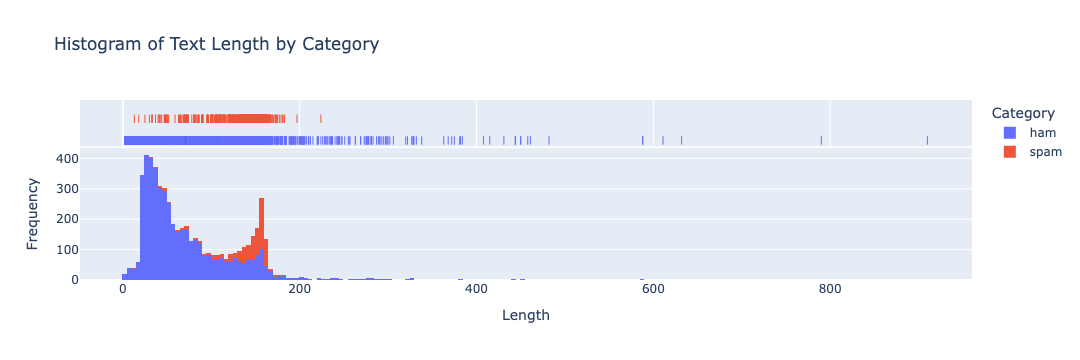

In [7]:
df['Length']=df['Text'].apply(len)
display(df.head())

fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

## Text Vectorization

In [18]:
def clean_text(text):
    # Convert to lowercase for consistency
    text = text.lower()
    
    # Remove URLs (http/https links)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove phone numbers (basic pattern)
    text = re.sub(r'\b\d{3}-\d{3}-\d{4}\b', '', text)
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text


df['cleaned_text'] = df['Text'].apply(clean_text)

print("\nText cleaning comparison:")
print("Original:", df['Text'].iloc[0])
print("Cleaned: ", df['cleaned_text'].iloc[0])
print("=" * 60)


Text cleaning comparison:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [19]:
tfidf = TfidfVectorizer(
    max_features=1000,      # Limit to top 1000 most important words
    stop_words='english',   # Remove common English words (the, and, or, etc.)
    ngram_range=(1, 2),     # Use both single words (unigrams) and word pairs (bigrams)
    min_df=2,               # Ignore terms that appear in fewer than 2 documents
    max_df=0.8              # Ignore terms that appear in more than 80% of documents
)

X_tfidf = tfidf.fit_transform(df['cleaned_text'])
y = df['Category']

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Number of features (words/phrases): {X_tfidf.shape[1]}")
print(f"Number of samples: {X_tfidf.shape[0]}")

TF-IDF matrix shape: (5572, 1000)
Number of features (words/phrases): 1000
Number of samples: 5572


In [20]:
X_dense = X_tfidf.toarray()
print(f"Matrix density (non-zero values): {np.count_nonzero(X_dense) / X_dense.size:.4f}")

# Show some example features
feature_names = tfidf.get_feature_names_out()
print(f"\nExample features: {feature_names[:10]}")

Matrix density (non-zero values): 0.0052

Example features: ['0800' '08000839402' '08000930705' '10' '100' '1000' '1000 cash' '10p'
 '10pmin' '12']


## Applying PCA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

n_components_list = [10, 50, 100, 200]
pca_results = {}

for n_comp in n_components_list:
    pca = PCA(n_components=n_comp, random_state=42)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    pca_results[n_comp] = {
        'pca_model': pca,
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance': np.cumsum(pca.explained_variance_ratio_)
    }
    
    print(f"\nPCA with {n_comp} components:")
    print(f"  Explained variance ratio (first 5): {pca.explained_variance_ratio_[:5]}")
    print(f"  Total explained variance: {pca.explained_variance_ratio_.sum():.4f}")
    print(f"  Reduced shape: {X_train_pca.shape}")

Training set shape: (4457, 1000)
Test set shape: (1115, 1000)

PCA with 10 components:
  Explained variance ratio (first 5): [0.01157078 0.01041298 0.00979369 0.00822569 0.00784727]
  Total explained variance: 0.0836
  Reduced shape: (4457, 10)

PCA with 50 components:
  Explained variance ratio (first 5): [0.01157079 0.01041339 0.00979394 0.00822698 0.00785039]
  Total explained variance: 0.2598
  Reduced shape: (4457, 50)

PCA with 100 components:
  Explained variance ratio (first 5): [0.01157079 0.01041339 0.00979393 0.00822691 0.00785036]
  Total explained variance: 0.3902
  Reduced shape: (4457, 100)

PCA with 200 components:
  Explained variance ratio (first 5): [0.01157079 0.01041339 0.00979394 0.00822698 0.00785039]
  Total explained variance: 0.5709
  Reduced shape: (4457, 200)


In [23]:
selected_pca = pca_results[100]['pca_model']

print(f"\n1. PRINCIPAL COMPONENTS (First 5):")
for i in range(5):
    print(f"   PC{i+1}: Explains {selected_pca.explained_variance_ratio_[i]:.4f} of total variance")

print(f"\n2. CUMULATIVE EXPLAINED VARIANCE:")
cumvar = selected_pca.explained_variance_ratio_.cumsum()
for i in [9, 24, 49, 99]:  # Show at 10, 25, 50, 100 components
    print(f"   First {i+1} components explain {cumvar[i]:.4f} of total variance")

print(f"\n3. DIMENSIONALITY REDUCTION IMPACT:")
print(f"   Original dimensions: {X_train.shape[1]}")
print(f"   Reduced dimensions: {selected_pca.n_components_}")
print(f"   Dimension reduction: {(1 - selected_pca.n_components_/X_train.shape[1]):.2%}")


1. PRINCIPAL COMPONENTS (First 5):
   PC1: Explains 0.0116 of total variance
   PC2: Explains 0.0104 of total variance
   PC3: Explains 0.0098 of total variance
   PC4: Explains 0.0082 of total variance
   PC5: Explains 0.0079 of total variance

2. CUMULATIVE EXPLAINED VARIANCE:
   First 10 components explain 0.0837 of total variance
   First 25 components explain 0.1658 of total variance
   First 50 components explain 0.2603 of total variance
   First 100 components explain 0.3902 of total variance

3. DIMENSIONALITY REDUCTION IMPACT:
   Original dimensions: 1000
   Reduced dimensions: 100
   Dimension reduction: 90.00%


## Applying classification algorithm

In [25]:
def train_and_evaluate_classifier(X_train, X_test, y_train, y_test, classifier_name, n_components):
    # Initialize classifier
    clf = LogisticRegression(random_state=42, max_iter=1000)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'model': clf
    }

lr_results_summary = {}

for n_comp in n_components_list:
    X_train_pca = pca_results[n_comp]['X_train_pca']
    X_test_pca = pca_results[n_comp]['X_test_pca']
    
    lr_results = train_and_evaluate_classifier(
        X_train_pca, X_test_pca, y_train, y_test, "Logistic Regression", n_comp
    )
    
    lr_results_summary[n_comp] = lr_results
    
    print(f" Result for LR:-")
    print(f"\nPCA Components: {n_comp}")
    print(f"  Accuracy:  {lr_results['accuracy']:.4f}")
    print(f"  Precision: {lr_results['precision']:.4f}")
    print(f"  Recall:    {lr_results['recall']:.4f}")
    print(f"  F1-Score:  {lr_results['f1_score']:.4f}")

 Result for LR:-

PCA Components: 10
  Accuracy:  0.9175
  Precision: 0.9385
  Recall:    0.4094
  F1-Score:  0.5701
 Result for LR:-

PCA Components: 50
  Accuracy:  0.9435
  Precision: 0.9574
  Recall:    0.6040
  F1-Score:  0.7407
 Result for LR:-

PCA Components: 100
  Accuracy:  0.9534
  Precision: 0.9619
  Recall:    0.6779
  F1-Score:  0.7953
 Result for LR:-

PCA Components: 200
  Accuracy:  0.9596
  Precision: 0.9815
  Recall:    0.7114
  F1-Score:  0.8249


In [27]:
best_n_comp = 100
best_results = lr_results_summary[best_n_comp]

print(f"DETAILED RESULTS FOR {best_n_comp} PCA COMPONENTS:")
print(f"Explained variance: {pca_results[best_n_comp]['cumulative_variance'][-1]:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, best_results['predictions']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_results['predictions'])
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"               Ham   Spam")
print(f"Actual   Ham   {cm[0,0]:3d}   {cm[0,1]:3d}")
print(f"         Spam  {cm[1,0]:3d}   {cm[1,1]:3d}")

DETAILED RESULTS FOR 100 PCA COMPONENTS:
Explained variance: 0.3902

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.96      0.68      0.80       149

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.88      1115
weighted avg       0.95      0.95      0.95      1115


Confusion Matrix:
                 Predicted
               Ham   Spam
Actual   Ham   962     4
         Spam   48   101


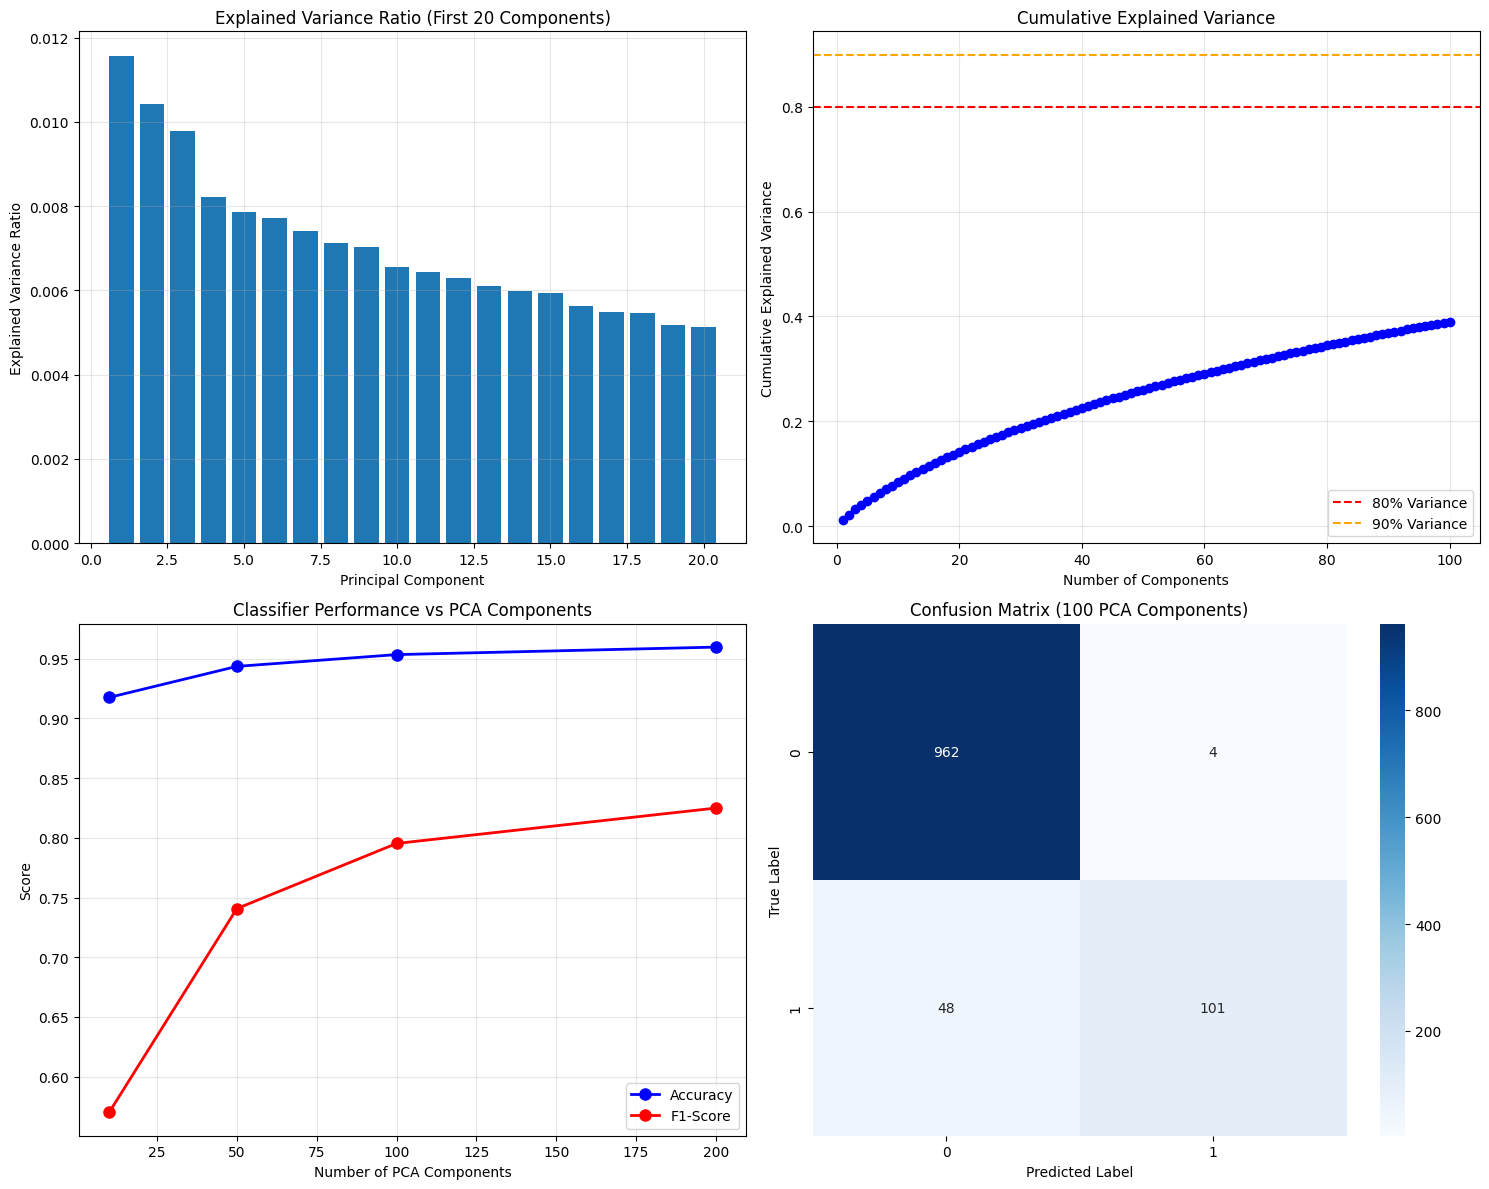

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

selected_pca = pca_results[100]['pca_model']
ax1.bar(range(1, 21), selected_pca.explained_variance_ratio_[:20])
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio (First 20 Components)')
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, 101), selected_pca.explained_variance_ratio_.cumsum(), 'bo-', linewidth=2)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)

components = list(lr_results_summary.keys())
accuracies = [lr_results_summary[k]['accuracy'] for k in components]
f1_scores = [lr_results_summary[k]['f1_score'] for k in components]

ax3.plot(components, accuracies, 'bo-', label='Accuracy', linewidth=2, markersize=8)
ax3.plot(components, f1_scores, 'ro-', label='F1-Score', linewidth=2, markersize=8)
ax3.set_xlabel('Number of PCA Components')
ax3.set_ylabel('Score')
ax3.set_title('Classifier Performance vs PCA Components')
ax3.legend()
ax3.grid(True, alpha=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_xlabel('Predicted Label')
ax4.set_ylabel('True Label')
ax4.set_title('Confusion Matrix (100 PCA Components)')

plt.tight_layout()
plt.show()

#### DIMENSIONALITY REDUCTION BENEFITS:
- ✓ Reduced computational complexity
- ✓ Faster training and prediction times
- ✓ Reduced memory usage
- ✓ Helps avoid curse of dimensionality
- ✓ Can reduce overfitting

#### NUMERICAL INSIGHTS:
- Original feature space: 1000 dimensions
- Reduced feature space: 100 dimensions
- Compression ratio: 90.0%
- Information retained: 39.0%
- Final model accuracy: 95.3%

#### PCA INTERPRETATION FOR TEXT DATA:
- Principal components represent 'topics' or 'themes' in the text
- Each component is a linear combination of original words/phrases
- Components are ordered by importance (variance explained)
- First few components capture the most discriminative patterns

#### WHEN TO USE PCA FOR TEXT:
- High-dimensional sparse data (like TF-IDF vectors)
- When computational resources are limited
- When you need to visualize high-dimensional text data
- To reduce noise and focus on main patterns

#### LIMITATIONS TO CONSIDER:
- Loss of interpretability (components are not original words)
- Linear transformation may miss non-linear patterns
- May lose important but low-variance discriminative features
- Requires careful selection of number of components